# OC_P3 Prédiction consommation d'énergie

Bienvenue dans le notebook de prédiction du projet "Anticipez les besoins en consommation de bâtiments".

# Sommaire
- <a href="#C1">I. Feature Engineering</a>
    - 1. Sélection et création de variables pertinentes
    - 2. Encodages des variables catégorielles
    - 3. Division des données en un ensemble de test
    <br></br>
- <a href="#C2">II. Entrainement et test de différents modèles</a>   
    - 1. Linear Regression
    - 2. Decision Tree Regressor
    - 3. Gradient Boosting
    - 4. Random Forest
    - 5. XGBoost
    - 6. GridSearchCV
    <br></br>
- <a href="#C3">III. Feature Importance</a>
    - 1. XGBoost
    - 2. Linear Regression
    - 3. Gradient Boosting
    - 4. Random Forest
    - 5. Decision Tree Regressor
    - 6. Pertinence de l'ENERGYStarScore

In [424]:
import os
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [306]:
# récupération du chemin d'accès de la typo et récupération de celle-ci dans la variable prop
fpath = os.path.join(mpl.get_data_path(), r'C:\Users\omira\Downloads\Optima Medium.ttf')
prop = fm.FontProperties(fname=fpath)

text_kwargs = dict(ha='center', va='center', fontsize=14, color='white')

# importation du thème seaborn
sns.set_theme(context='notebook', style='darkgrid', palette='dark', font_scale=1, color_codes=True, rc=None)
sns.set(font=prop.get_name())
# upgrade de la résolution des visualisations
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

# set dark background
plt.style.use("dark_background")

In [307]:
# charger et lire le dataframe
df = pd.read_csv('C:/Users/omira/Desktop/Anticipate-Energy-Needs/buildings_cleaned.csv')

# <a name="C1">I. Feature Engineering</a>

<font size="5">1. Sélection et création de variables pertinentes</font>

In [308]:
# Cette étape à été effectuée dans le notebook de nettoyage en choisant ces variables :
pd.set_option('display.max_columns', None)
df[["BuildingType","PrimaryPropertyType","YearBuilt","NumberofBuildings","NumberofFloors","PropertyGFATotal",
                "ENERGYSTARScore","SiteEUI(kBtu/sf)","SiteEnergyUse(kBtu)","Electricity(kWh)",
                "NaturalGas(therms)","TotalGHGEmissions"]]

,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),Electricity(kWh),NaturalGas(therms),TotalGHGEmissions
0,NonResidential,Hotel,1927,1.0,12,88434,60.000,81.699997,7.226362e+06,1.156514e+06,12764.529300,249.98
1,NonResidential,Hotel,1996,1.0,11,103566,61.000,94.800003,8.387933e+06,9.504252e+05,51450.816410,295.86
2,NonResidential,Hotel,1926,1.0,10,61320,56.000,110.800003,6.794584e+06,8.115253e+05,18112.130860,286.43
3,NonResidential,Hotel,1980,1.0,18,175580,75.000,114.800003,1.417261e+07,1.573449e+06,88039.984380,505.01
4,Nonresidential COS,Other,1999,1.0,2,97288,59.625,136.100006,1.208662e+07,2.160444e+06,47151.816410,301.81
...,...,...,...,...,...,...,...,...,...,...,...,...
3336,Nonresidential COS,Office,1990,1.0,1,12294,46.000,69.099998,8.497457e+05,1.536550e+05,3254.750244,20.94
3337,Nonresidential COS,Other,2004,1.0,1,16000,82.250,59.400002,9.502762e+05,1.162210e+05,5537.299805,32.17
3338,Nonresidential COS,Other,1974,1.0,1,13157,78.750,438.200012,5.765898e+06,5.252517e+05,39737.390630,223.54
3339,Nonresidential COS,Mixed Use Property,1989,1.0,1,14101,81.750,51.000000,7.194712e+05,1.022480e+05,3706.010010,22.11


In [309]:
# créer une variable de l'âge des immeubles
df['BuildingAge'] = 2023 - df['YearBuilt']

In [310]:
# autre exemple de feature engineering, créer une nouvelle variable du ration de nombre d'étages par immeuble
df['RatioFloorsPerBuilding'] = df["NumberofFloors"] / df["NumberofBuildings"]

In [311]:
# créer une fonction pour checker si les nouvelles variables crées ne contiennent pas de valeurs nulles
# infinies.

def infinite_check(string):
    if (df[string] == 0).any() or np.isinf(df[string]).any() or np.isnan(df[string]).any():
        print("La colonne contient des valeurs égales à zéro ou infinies.")
    else:
        print("La colonne ne contient pas de valeurs égales à zéro ou infinies.")

In [312]:
infinite_check('BuildingAge')

La colonne ne contient pas de valeurs égales à zéro ou infinies.


In [313]:
infinite_check('RatioFloorsPerBuilding')

La colonne contient des valeurs égales à zéro ou infinies.


In [314]:
# Remplace les valeurs infinies par NaN
df['RatioFloorsPerBuilding'] = df['RatioFloorsPerBuilding'].replace([np.inf, -np.inf], np.nan)
# Remplace les NaN par la médiane de chaque colonne
df['RatioFloorsPerBuilding'] = df['RatioFloorsPerBuilding'].fillna(df['RatioFloorsPerBuilding'].median())

In [315]:
# omissions des valeurs zéros pour la variable electricity en vue du futur np.lop()
df = df.loc[df['Electricity(kWh)'] > 0]
# création du tableau des features
X = df.drop(columns=['SiteEnergyUse(kBtu)'])
# création de la variable cible, ici la consommation totale d'énergie
y = df['SiteEnergyUse(kBtu)']

<font size="5">2. Encodage des variables catégorielles</font>

In [316]:
# dummyfication (encoding des variables categorielles en variables numériques)
X = pd.get_dummies(X)

In [317]:
# transformation log, réduire l'impact des valeurs extrêmes
# ici j'ai choisis la variable la plus asymétrique que j'ai pu trouver dans le notebook de nettoyage
X['Electricity(kWh)'] = np.log(X['Electricity(kWh)'])

In [319]:
# on vérifie qu'on a pas perdu trop de données par rapport au dataframe source
X.shape

(3326, 43)

<font size="5">3. Division des données en un ensemble de test</font>

In [320]:
# Division des données en un ensemble d'entraînement et un ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# <a name="C2">II. Entrainement et test de différents modèles</a>

<font size="5">1. Linear Regression</font>

In [321]:
# Création de l'objet de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul de la MSE et R², MAE et RMSE
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)
mae_linear = mean_absolute_error(y_test, y_pred)

# Affichage des résultats
print('MSE:', mse_linear)
print('R²:', r2_linear)
print('MAE:', mae_linear)

MSE: 5030937349644.41
R²: 0.8986967659945927
MAE: 1142081.6753827455


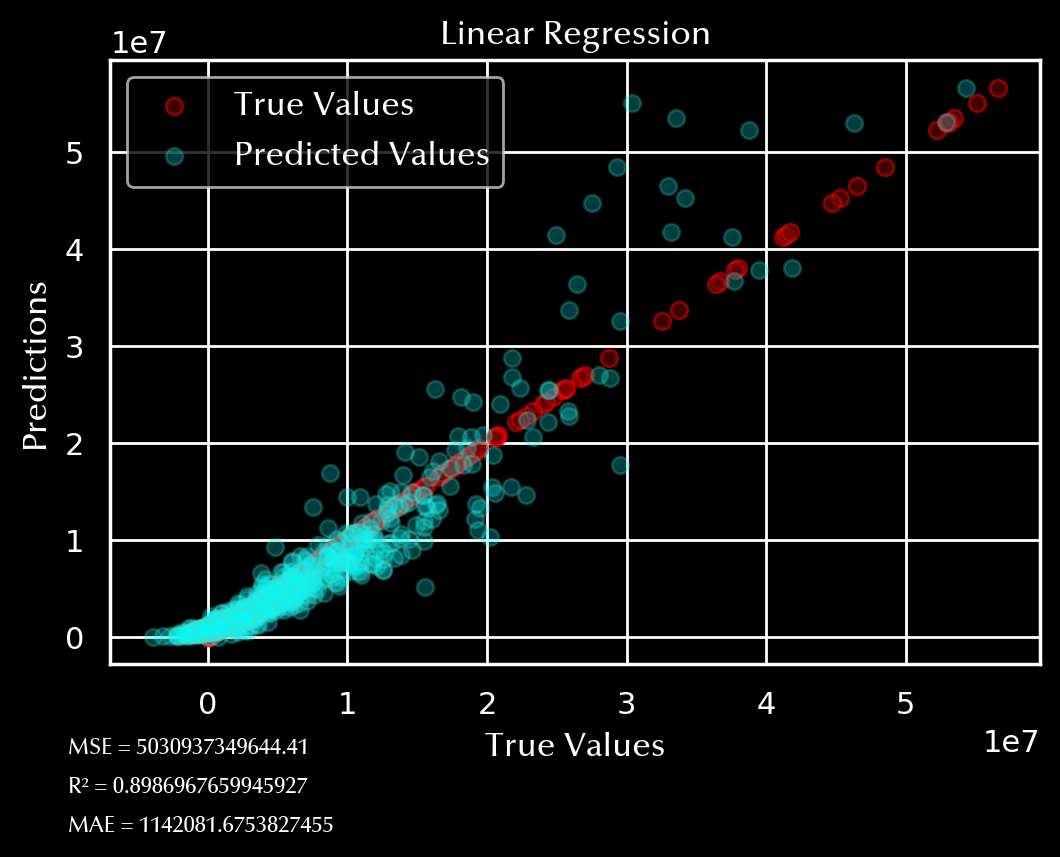

In [322]:
sns.scatterplot(y=y_test, x=y_test, color='maroon', label='True Values', alpha=0.5, edgecolor='red', linewidth=1)
sns.scatterplot(y=y_test, x=y_pred, color='aqua', label='Predicted Values', alpha=0.25, edgecolor='turquoise', linewidth=1)
plt.xlabel('True Values', fontproperties=prop)
plt.ylabel('Predictions', fontproperties=prop)
plt.title('Linear Regression', fontproperties=prop)
plt.legend(loc='best', prop=prop)
plt.text(-10000000, -12000000, 'MSE = {}'.format(mse_linear), fontproperties=prop, size=8)
plt.text(-10000000, -16000000, 'R² = {}'.format(r2_linear), fontproperties=prop, size=8)
plt.text(-10000000, -20000000, 'MAE = {}'.format(mae_linear), fontproperties=prop, size=8)
plt.show()

<font size="5">2. Decision Regression Tree</font>

In [429]:
# Initialisation du modèle de régression par arbre de décision
regressor = DecisionTreeRegressor(random_state=42)

# Entraînement du modèle sur le jeu d'entraînement
regressor.fit(X_train, y_train)

# Prédiction sur le jeu de test
y_pred = regressor.predict(X_test)

# Évaluation du modèle sur le jeu de test
mse_tree = mean_squared_error(y_test, y_pred)
r2_tree = r2_score(y_test, y_pred)
mae_tree = mean_absolute_error(y_test, y_pred)

print("Score R²: ", r2_tree)
print("MSE: ", mse_tree)
print("MAE: ", mae_tree)

Score R²:  0.966049738144305
MSE:  1686043314183.902
MAE:  338848.58136188524


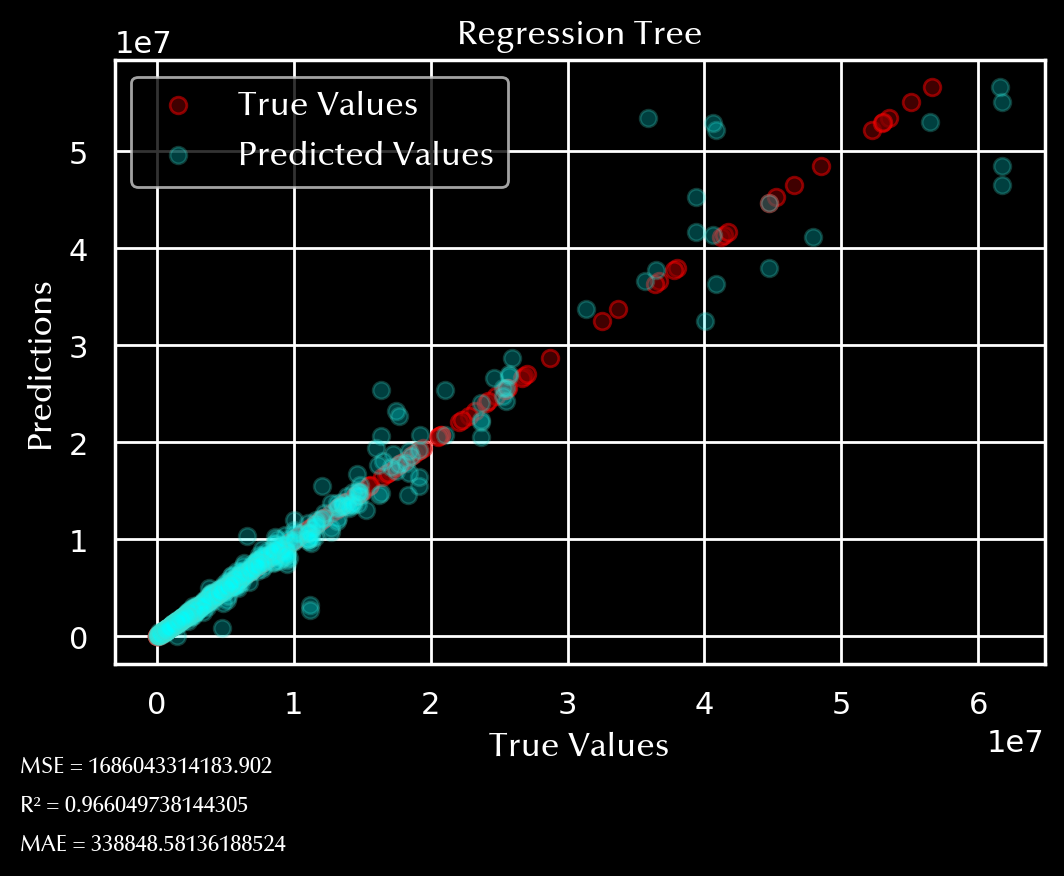

In [431]:
sns.scatterplot(y=y_test, x=y_test, color='maroon', label='True Values', alpha=0.5, edgecolor='red', linewidth=1)
sns.scatterplot(y=y_test, x=y_pred, color='aqua', label='Predicted Values', alpha=0.25, edgecolor='turquoise', linewidth=1)
plt.xlabel('True Values', fontproperties=prop)
plt.ylabel('Predictions', fontproperties=prop)
plt.title('Regression Tree', fontproperties=prop)
plt.legend(loc='best', prop=prop)
plt.text(-10000000, -14000000, 'MSE = {}'.format(mse_tree), fontproperties=prop, size=8)
plt.text(-10000000, -18000000, 'R² = {}'.format(r2_tree), fontproperties=prop, size=8)
plt.text(-10000000, -22000000, 'MAE = {}'.format(mae_tree), fontproperties=prop, size=8)
plt.show()

<font size="5">3. Gradient Boosting</font>

In [432]:
#Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)

# Entraîner le modèle
gbr.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = gbr.predict(X_test)

# Calculer le score MSE et R2
mse_gradient = mean_squared_error(y_test, y_pred)
r2_gradient = r2_score(y_test, y_pred)
mae_gradient = mean_absolute_error(y_test, y_pred)

print("Score MSE: ", mse_gradient)
print("R²: ", r2_gradient)
print("Score MAE: ", mae_gradient)

Score MSE:  361504530558.8305
R²:  0.9927207246864633
Score MAE:  311053.1938533148


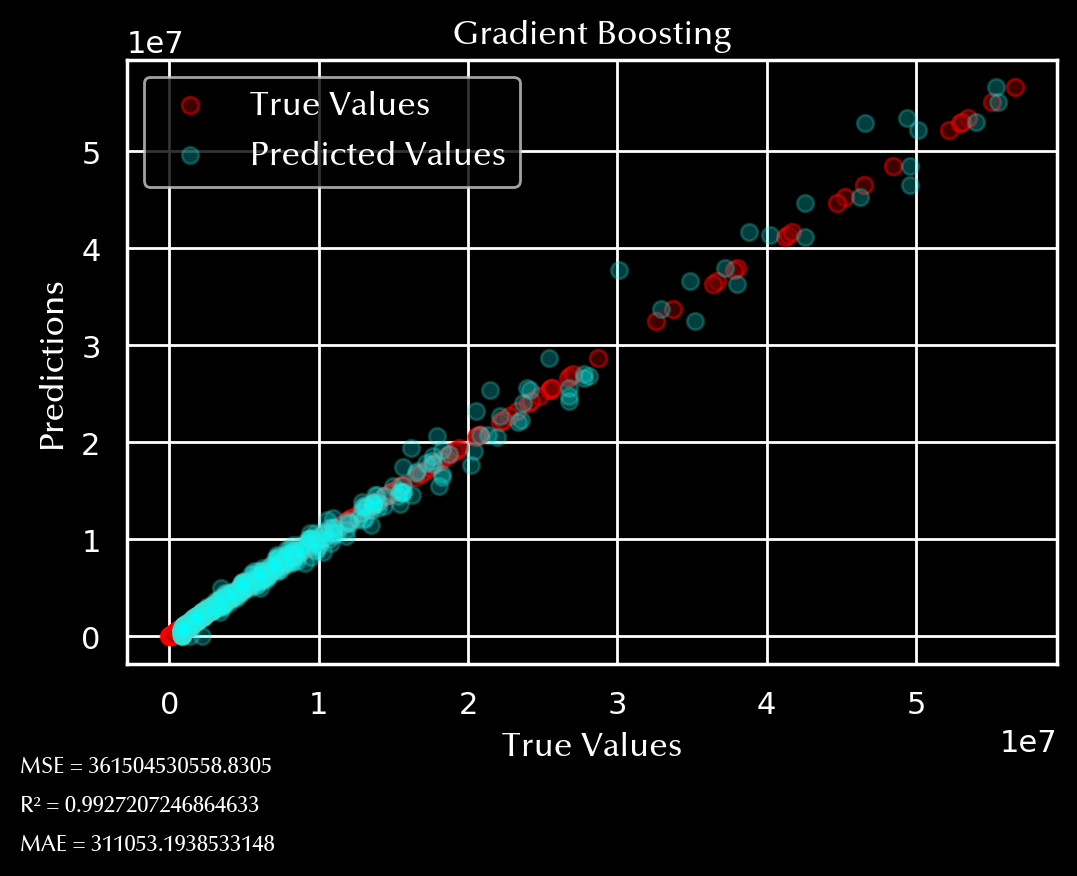

In [433]:
sns.scatterplot(y=y_test, x=y_test, color='maroon', label='True Values', alpha=0.5, edgecolor='red', linewidth=1)
sns.scatterplot(y=y_test, x=y_pred, color='aqua', label='Predicted Values', alpha=0.25, edgecolor='turquoise', linewidth=1)
plt.xlabel('True Values', fontproperties=prop)
plt.ylabel('Predictions', fontproperties=prop)
plt.title('Gradient Boosting', fontproperties=prop)
plt.legend(loc='best', prop=prop)
plt.text(-10000000, -14000000, 'MSE = {}'.format(mse_gradient), fontproperties=prop, size=8)
plt.text(-10000000, -18000000, 'R² = {}'.format(r2_gradient), fontproperties=prop, size=8)
plt.text(-10000000, -22000000, 'MAE = {}'.format(mae_gradient), fontproperties=prop, size=8)
plt.show()

<font size="5">4. Random Forest Regressor</font>

In [434]:
# Instanciation et entraînement du modèle RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = rf.predict(X_test)

# Calcul de la performance du modèle en utilisant l'erreur quadratique moyenne (MSE)
mse_random_forest = mean_squared_error(y_test, y_pred)
r2_random_forest = r2_score(y_test, y_pred)
mae_random_forest = mean_absolute_error(y_test, y_pred)

print("MSE: %.2f" % mse_random_forest)
print("R²: %.2f" % r2_random_forest)
print("MAE: %.2f" % mae_random_forest)

MSE: 525656110216.10
R²: 0.99
MAE: 202901.39


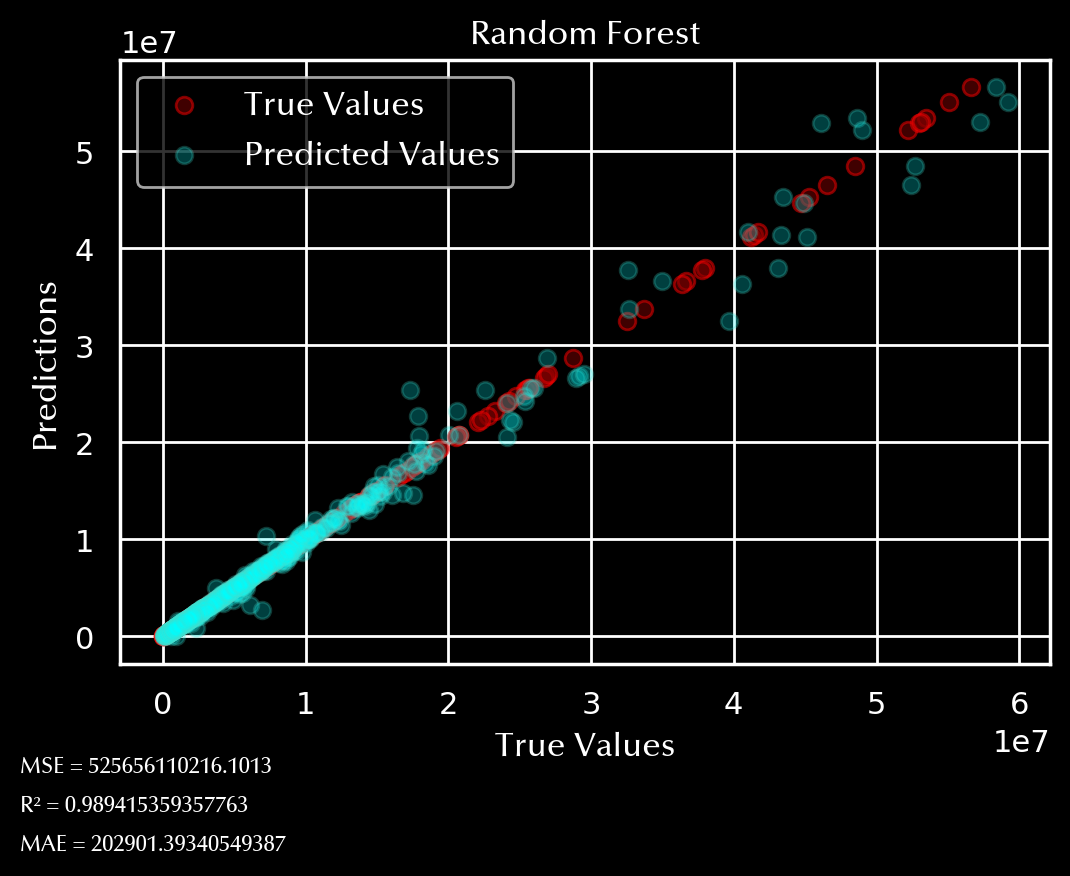

In [435]:
sns.scatterplot(y=y_test, x=y_test, color='maroon', label='True Values', alpha=0.5, edgecolor='red', linewidth=1)
sns.scatterplot(y=y_test, x=y_pred, color='aqua', label='Predicted Values', alpha=0.25, edgecolor='turquoise', linewidth=1)
plt.xlabel('True Values', fontproperties=prop)
plt.ylabel('Predictions', fontproperties=prop)
plt.title('Random Forest', fontproperties=prop)
plt.legend(loc='best', prop=prop)
plt.text(-10000000, -14000000, 'MSE = {}'.format(mse_random_forest), fontproperties=prop, size=8)
plt.text(-10000000, -18000000, 'R² = {}'.format(r2_random_forest), fontproperties=prop, size=8)
plt.text(-10000000, -22000000, 'MAE = {}'.format(mae_random_forest), fontproperties=prop, size=8)
plt.show()

<font size="5">5. XGBoost</font>

In [437]:
# Instanciation et entraînement du modèle XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = xgb.predict(X_test)

# Calcul de la performance du modèle en utilisant l'erreur quadratique moyenne (MSE)
mse_xgboost = mean_squared_error(y_test, y_pred)
r2_xgboost = r2_score(y_test, y_pred)
mae_xgboost = mean_absolute_error(y_test, y_pred)

print("MSE: %.2f" % mse_xgboost)
print("R2: %.2f" % r2_xgboost)
print("MAE: %.2f" % mae_xgboost)

MSE: 353759455131.39
R2: 0.99
MSE: 194710.01


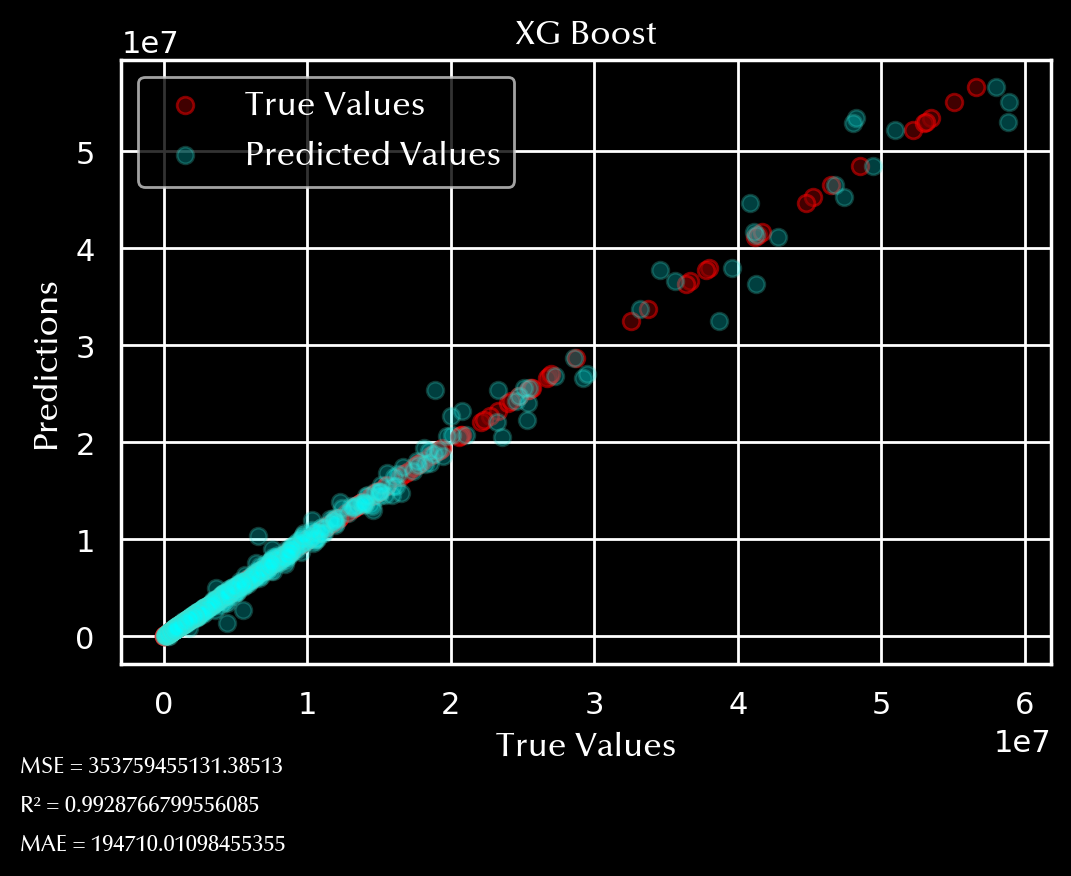

In [439]:
sns.scatterplot(y=y_test, x=y_test, color='maroon', label='True Values', alpha=0.5, edgecolor='red', linewidth=1)
sns.scatterplot(y=y_test, x=y_pred, color='aqua', label='Predicted Values', alpha=0.25, edgecolor='turquoise', linewidth=1)
plt.xlabel('True Values', fontproperties=prop)
plt.ylabel('Predictions', fontproperties=prop)
plt.title('XG Boost', fontproperties=prop)
plt.legend(loc='best', prop=prop)
plt.text(-10000000, -14000000, 'MSE = {}'.format(mse_xgboost), fontproperties=prop, size=8)
plt.text(-10000000, -18000000, 'R² = {}'.format(r2_xgboost), fontproperties=prop, size=8)
plt.text(-10000000, -22000000, 'MAE = {}'.format(mae_xgboost), fontproperties=prop, size=8)
plt.show()

In [334]:
# si jamais le spiderchart ne s'affiche pas, executer cette ligne pour rétablir la connection
from plotly.offline import iplot, init_notebook_mode; init_notebook_mode(connected=True)

In [440]:
# affichage en spiderchart des scores r2 des algorithmes
data = [
    {'r': r2_linear, 'theta': 'LinearRegression'},
    {'r': r2_tree, 'theta': 'DecisionTreeRegressor'},
    {'r': r2_random_forest, 'theta': 'RandomForest'},
    {'r': r2_gradient, 'theta': 'GradientBoost'},
    {'r': r2_xgboost, 'theta': 'XGBoost'}
]
fig = px.line_polar(data, r='r', theta='theta',title="Score R2 pour les algorithmes", line_close=True, template='plotly_dark', color_discrete_sequence=['royalblue'])
fig.update_traces(fill='toself')
# change la police
fig.update_layout(
    font=dict(
        family="Optima",
        size=12,
        color="white"
    )
)
# Masquer la ligne représentant les valeurs de 0 à 5 sur l'axe radial
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            showline=False, # masquer la ligne sur l'axe radial
            range=[0,1], # plage maximale de l'axe radial
            showticklabels=False
        )
    )
)

fig.update_layout(
    polar=dict(
        radialaxis=dict(gridcolor='gray', linecolor='gray'),
        angularaxis=dict(gridcolor='gray', linecolor='gray')
    )
)
fig.show()

C:\Users\omira\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [336]:
# on vérifie que XGBoost possède le meilleur score r2
if r2_xgboost > r2_gradient and r2_xgboost and r2_tree and r2_xgboost > r2_linear and r2_xgboost > r2_random_forest:
    print('True')
else:
    print('False')

True


In [337]:
# affichage en spiderchart des scores MSE des algorithmes
df = pd.DataFrame(dict(
    r=[mse_linear/10e9, mse_tree/10e9, mse_random_forest/10e9, mse_gradient/10e9, mse_xgboost/10e9],
    theta=['LinearRegression','DecisionTreeRegressor','RandomForest',
           'GradientBoost', 'XGBoost']))

fig = px.line_polar(df, r='r', theta='theta',title="Score MSE pour les algorithmes", line_close=True, template='plotly_dark', color_discrete_sequence=['royalblue'])
fig.update_traces(fill='toself')
# change la police
fig.update_layout(
    font=dict(
        family="Optima",
        size=12,
        color="white"
    )
)
# Masquer la ligne représentant les valeurs de 0 à 5 sur l'axe radial
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            showline=False, # masquer la ligne sur l'axe radial
            range=[0,200], # plage maximale de l'axe radial
            showticklabels=False
        )
    )
)

fig.update_layout(
    polar=dict(
        radialaxis=dict(gridcolor='gray', linecolor='gray'),
        angularaxis=dict(gridcolor='gray', linecolor='gray')
    )
)
fig.show()

C:\Users\omira\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [338]:
mse_xgboost > mse_gradient

False

In [339]:
# affichage en spiderchart des scores MAE des algorithmes
data = [
    {'r': mae_linear/10e3, 'theta': 'LinearRegression'},
    {'r': mae_tree/10e3, 'theta': 'DecisionTreeRegressor'},
    {'r': mae_random_forest/10e3, 'theta': 'RandomForest'},
    {'r': mae_gradient/10e3, 'theta': 'GradientBoost'},
    {'r': mae_xgboost/10e3, 'theta': 'XGBoost'}
]
fig = px.line_polar(data, r='r', theta='theta',title="Score MAE pour les algorithmes", line_close=True, template='plotly_dark', color_discrete_sequence=['royalblue'])
fig.update_traces(fill='toself')
# change la police
fig.update_layout(
    font=dict(
        family="Optima",
        size=12,
        color="white"
    )
)
# Masquer la ligne représentant les valeurs de 0 à 5 sur l'axe radial
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            showline=False, # masquer la ligne sur l'axe radial
            range=[0,50], # plage maximale de l'axe radial
            showticklabels=False
        )
    )
)
# changer les couleurs de fond et de la grille
fig.update_layout(
    polar=dict(
        radialaxis=dict(gridcolor='gray', linecolor='gray'),
        angularaxis=dict(gridcolor='gray', linecolor='gray')
    )
)
fig.show()

C:\Users\omira\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [340]:
mae_xgboost > mae_tree

False

<font size="5">6. GridSearchCV</font>

In [425]:
# GridSeachCV -> Utilisé pour trouver les meilleurs hyperpramètres du modèle
# Définition du modèle LinearRegression
model_linear = LinearRegression()

# Paramètres à tester
parameters = {'fit_intercept':[True, False]}

# Définition de la grille de recherche
grid_linear = GridSearchCV(model_linear, parameters, cv=3)

# Recherche des meilleurs paramètres sur les données d'entraînement
grid_linear.fit(X_train, y_train)

# Meilleur modèle trouvé
best_model_lr = grid_linear.best_estimator_

# Prédictions sur les données de test
y_pred_lr_best_model = best_model_lr.predict(X_test)

# Calcul de MSE et MAE
mse_linear_regression_best_model = mean_squared_error(y_test, y_pred_lr_best_model)
mae_linear_regression_best_model = mean_absolute_error(y_test, y_pred_lr_best_model)

# Comparaison avec XGBoost
mse_xgboost > mse_linear_regression_best_model

False

In [377]:
# Définition du modèle GradientBoosting
model_gbr = GradientBoostingRegressor(random_state=42)

# Paramètres à tester
parameters = {'n_estimators':[1,50,100], 'learning_rate':[0.1,0.01], 'max_depth':[1,5]}

# Définition de la grille de recherche
grid_gbr = GridSearchCV(model_gbr, parameters, cv=3)

# Recherche des meilleurs paramètres sur les données d'entraînement
grid_gbr.fit(X_train, y_train)

# Meilleur modèle trouvé
best_model_gbr = grid_gbr.best_estimator_

# Prédictions sur les données de test
y_pred_gbr_best_model = best_model_gbr.predict(X_test)

# Calcul de MSE et MAE
mse_gbr_best_model = mean_squared_error(y_test, y_pred_gbr_best_model)
mae_gbr_best_model = mean_absolute_error(y_test, y_pred_gbr_best_model)

# Comparaison avec XGBoost
mse_gbr_best_model > mse_xgboost

True

In [379]:
# Définition du modèle de régression par arbre de décision
model_dtr = DecisionTreeRegressor(random_state=42)

# Paramètres à tester
parameters = {'max_depth': [1, 5, 10], 'min_samples_split': [2, 5, 10]}

# Définition de la grille de recherche
grid_dtr = GridSearchCV(model_dtr, parameters, cv=3)

# Recherche des meilleurs paramètres sur les données d'entraînement
grid_dtr.fit(X_train, y_train)

# Meilleur modèle trouvé
best_model_dtr = grid_dtr.best_estimator_

# Prédictions sur les données de test
y_pred_dtr_best_model = best_model_dtr.predict(X_test)

# Calcul de MSE et MAE
mse_dtr_best_model = mean_squared_error(y_test, y_pred_dtr_best_model)
mae_dtr_best_model = mean_absolute_error(y_test, y_pred_dtr_best_model)

# Comparaison avec XGBoost
mse_dtr_best_model > mse_xgboost

True

In [381]:
# Définition du modèle de régression par random forest
model_rfr = RandomForestRegressor(random_state=42)

# Paramètres à tester
parameters = {'n_estimators':[10, 50, 100], 'max_depth':[1, 5, 10], 'min_samples_split':[2, 5, 10]}

# Définition de la grille de recherche
grid_rfr = GridSearchCV(model_rfr, parameters, cv=3)

# Recherche des meilleurs paramètres sur les données d'entraînement
grid_rfr.fit(X_train, y_train)

# Meilleur modèle trouvé
best_model_rfr = grid_rfr.best_estimator_

# Prédictions sur les données de test
y_pred_rfr_best_model = best_model_rfr.predict(X_test)

# Calcul de MSE et MAE
mse_rfr_best_model = mean_squared_error(y_test, y_pred_rfr_best_model)
mae_rfr_best_model = mean_absolute_error(y_test, y_pred_rfr_best_model)

# Comparaison avec XGBoost
mse_rfr_best_model > mse_xgboost

True

In [426]:
# Définition du modèle de régression XGBoost
model_xgb = XGBRegressor(random_state=42)

# Paramètres à tester
parameters = {'n_estimators': [50,100,200], 'learning_rate': [0.1,0.05,0.01], 'max_depth': [3,6,9]}

# Définition de la grille de recherche
grid_xgb = GridSearchCV(model_xgb, parameters, cv=3)

# Recherche des meilleurs paramètres sur les données d'entraînement
grid_xgb.fit(X_train, y_train)

# Meilleur modèle trouvé
best_model_xgb = grid_xgb.best_estimator_

# Prédictions sur les données de test
y_pred_xgb_best_model = best_model_xgb.predict(X_test)

# Calcul de MSE et MAE
mse_xgb_best_model = mean_squared_error(y_test, y_pred_xgb_best_model)
mae_xgb_best_model = mean_absolute_error(y_test, y_pred_xgb_best_model)

# Comparaison avec XGBoost
mse_xgb_best_model > mse_xgboost

False

In [383]:
data = [
    {'r': mse_linear_regression_best_model, 'theta': 'LinearRegression'},
    {'r': mse_dtr_best_model, 'theta': 'DecisionTreeRegressor'},
    {'r': mse_rfr_best_model, 'theta': 'RandomForest'},
    {'r': mse_gbr_best_model, 'theta': 'GradientBoost'},
    {'r': mse_xgb_best_model, 'theta': 'XGBoost'}
]
fig = px.line_polar(data, r='r', theta='theta',title="Score MSE pour les algorithmes après GridSearchCV", line_close=True, template='plotly_dark', color_discrete_sequence=['royalblue'])
fig.update_traces(fill='toself')
# change la police
fig.update_layout(
    font=dict(
        family="Optima",
        size=12,
        color="white"
    )
)
# Masquer la ligne représentant les valeurs de 0 à 5 sur l'axe radial
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            showline=False, # masquer la ligne sur l'axe radial
            range=[0,2000000000000], # plage maximale de l'axe radial
            showticklabels=True
        )
    )
)
# changer les couleurs de fond et de la grille
fig.update_layout(
    polar=dict(
        radialaxis=dict(gridcolor='gray', linecolor='gray'),
        angularaxis=dict(gridcolor='gray', linecolor='gray')
    )
)
fig.show()

C:\Users\omira\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [384]:
mse_xgb_best_model > mse_gbr_best_model

False

In [385]:
data = [
    {'r': mae_linear_regression_best_model, 'theta': 'LinearRegression'},
    {'r': mae_dtr_best_model, 'theta': 'DecisionTreeRegressor'},
    {'r': mae_rfr_best_model, 'theta': 'RandomForest'},
    {'r': mae_gbr_best_model, 'theta': 'GradientBoost'},
    {'r': mae_xgb_best_model, 'theta': 'XGBoost'}
]
fig = px.line_polar(data, r='r', theta='theta',title="Score MAE pour les algorithmes après GridSearchCV", line_close=True, template='plotly_dark', color_discrete_sequence=['royalblue'])
fig.update_traces(fill='toself')
# change la police
fig.update_layout(
    font=dict(
        family="Optima",
        size=12,
        color="white"
    )
)
# Masquer la ligne représentant les valeurs de 0 à 5 sur l'axe radial
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            showline=False, # masquer la ligne sur l'axe radial
            range=[0,500000], # plage maximale de l'axe radial
            showticklabels=True
        )
    )
)
# changer les couleurs de fond et de la grille
fig.update_layout(
    polar=dict(
        radialaxis=dict(gridcolor='gray', linecolor='gray'),
        angularaxis=dict(gridcolor='gray', linecolor='gray')
    )
)
fig.show()

C:\Users\omira\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [386]:
mae_xgb_best_model > mae_rfr_best_model

False

# <a name="C3">III. Feature Importance</a>

<font size="5">1. XGBoost Feature Importance</font>

In [413]:
importance = best_model_xgb.feature_importances_
feature_importance = pd.DataFrame(list(zip(X, importance)), columns=["feature", "importance"])
feature_importance = feature_importance.sort_values(by="importance", ascending=False)
print(feature_importance)

                                            feature  importance
5                                  Electricity(kWh)    0.846228
7                                 TotalGHGEmissions    0.118779
40                   PrimaryPropertyType_University    0.005024
8                                   ENERGYSTARScore    0.004914
6                                NaturalGas(therms)    0.004905
10                           RatioFloorsPerBuilding    0.004776
4                                  SiteEUI(kBtu/sf)    0.003928
2                                  PropertyGFATotal    0.003769
25                 PrimaryPropertyType_Large Office    0.002326
3                                 NumberofBuildings    0.001846
0                                         YearBuilt    0.001790
1                                    NumberofFloors    0.000608
22                        PrimaryPropertyType_Hotel    0.000435
16                  BuildingType_Nonresidential COS    0.000218
31                        PrimaryPropert

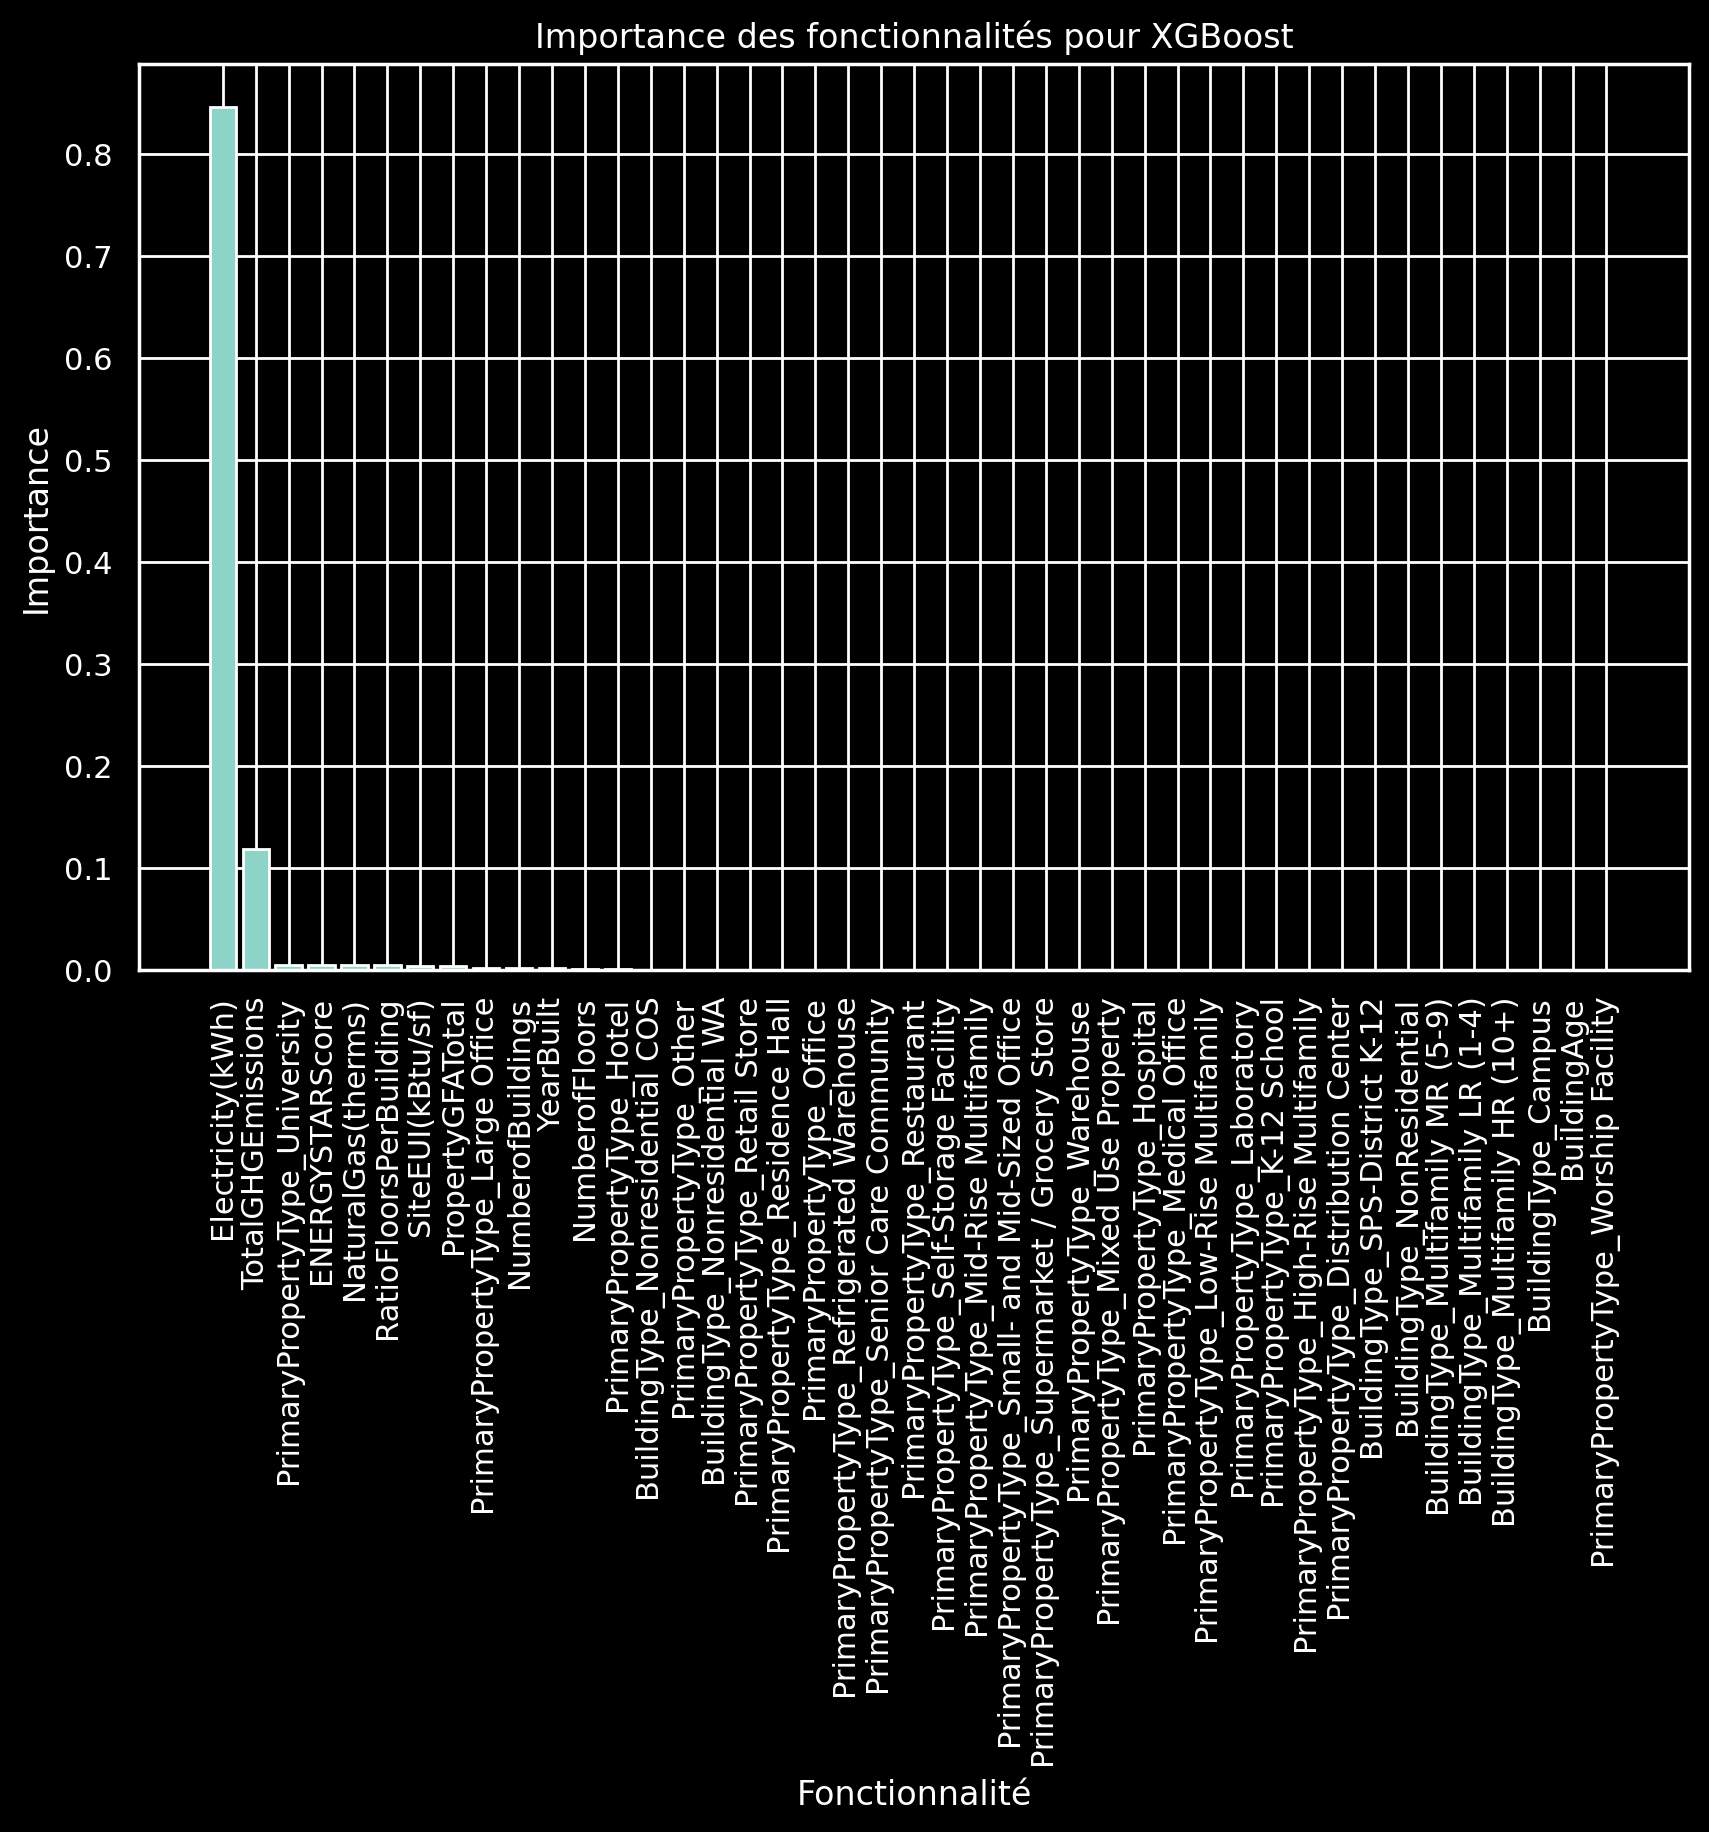

In [414]:
importance = best_model_xgb.feature_importances_
feature_importance = pd.DataFrame(list(zip(X, importance)), columns=["feature", "importance"])
feature_importance = feature_importance.sort_values(by="importance", ascending=False)

# créer un graphique en barres
plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.xlabel('Fonctionnalité')
plt.ylabel('Importance')
plt.title('Importance des fonctionnalités pour XGBoost')

# afficher le graphique
plt.show()

<font size="5">2. LinearRegression Feature Importance</font>

In [415]:
# ici on utiliser la méthode .coef_ plutot que feature_importances_
importance = abs(best_model_lr.coef_)
feature_importance = pd.DataFrame(list(zip(X.columns, importance)), columns=["feature", "importance"])
feature_importance = feature_importance.sort_values(by="importance", ascending=False)

print(feature_importance)

                                            feature    importance
21                     PrimaryPropertyType_Hospital  5.021529e+06
39  PrimaryPropertyType_Supermarket / Grocery Store  3.769837e+06
34                   PrimaryPropertyType_Restaurant  2.426985e+06
40                   PrimaryPropertyType_University  2.220382e+06
12                BuildingType_Multifamily HR (10+)  2.168036e+06
11                              BuildingType_Campus  2.160370e+06
30                       PrimaryPropertyType_Office  1.826680e+06
22                        PrimaryPropertyType_Hotel  1.676742e+06
17                   BuildingType_Nonresidential WA  1.571967e+06
24                   PrimaryPropertyType_Laboratory  1.194646e+06
25                 PrimaryPropertyType_Large Office  1.074984e+06
20        PrimaryPropertyType_High-Rise Multifamily  8.965513e+05
18                   BuildingType_SPS-District K-12  8.216416e+05
15                      BuildingType_NonResidential  7.366660e+05
27        

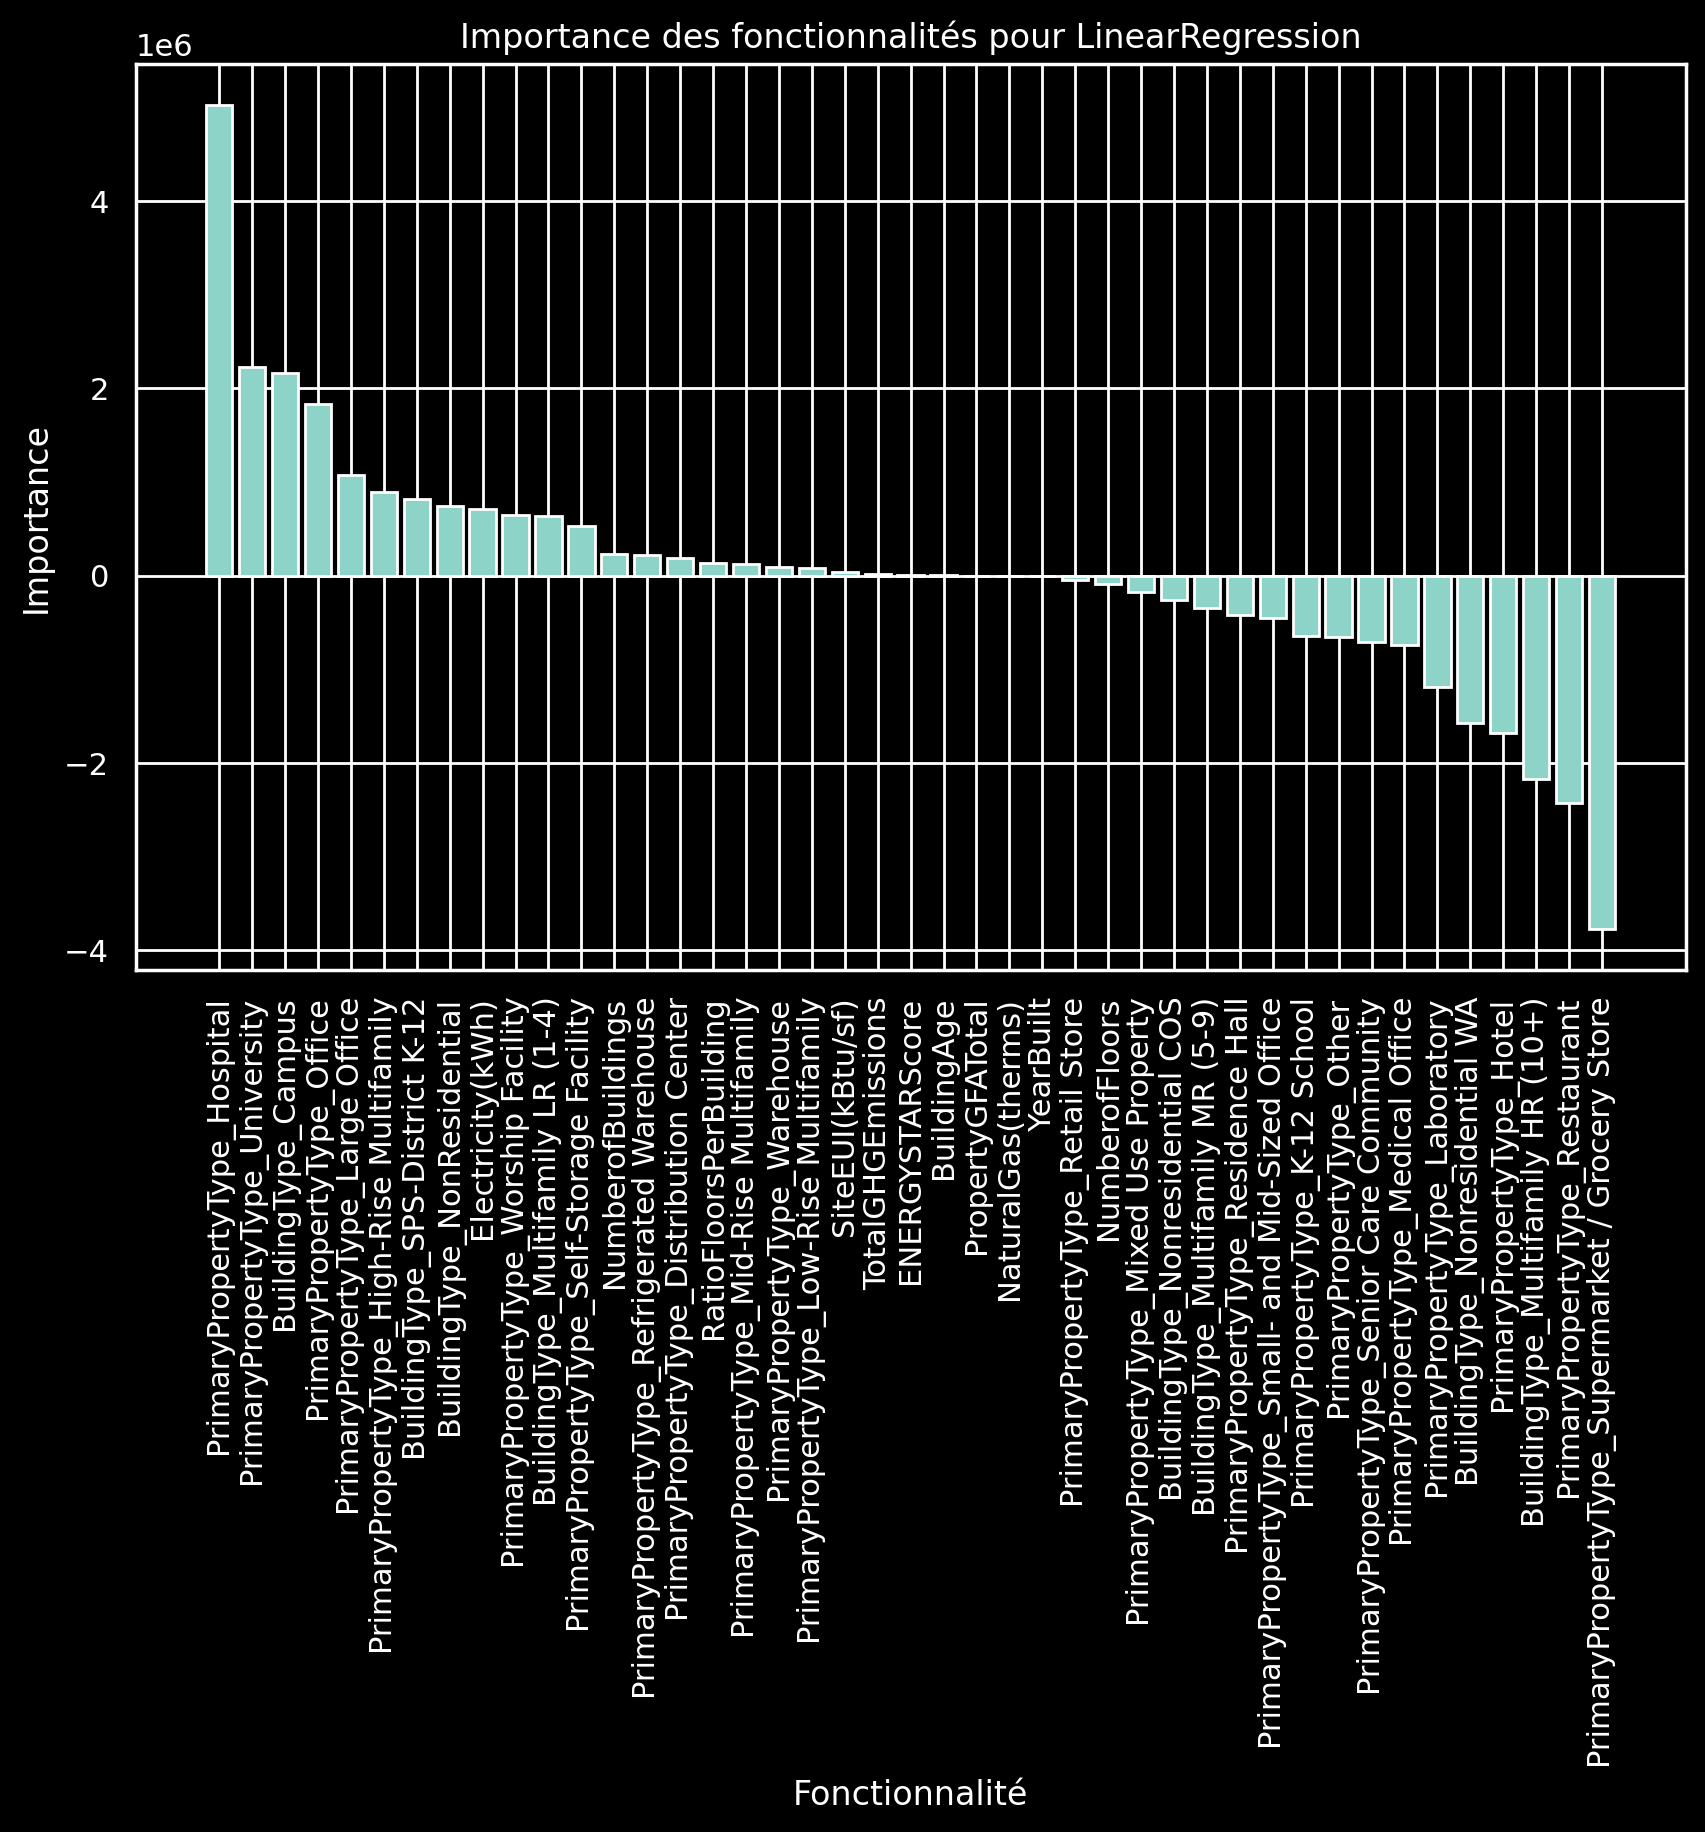

In [416]:
importance = best_model_lr.coef_
feature_importance = pd.DataFrame(list(zip(X, importance)), columns=["feature", "importance"])
feature_importance = feature_importance.sort_values(by="importance", ascending=False)

# créer un graphique en barres
plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.xlabel('Fonctionnalité')
plt.ylabel('Importance')
plt.title('Importance des fonctionnalités pour LinearRegression')

# afficher le graphique
plt.show()

<font size="5">3. Gradient Boosting Feature Importance</font>

In [417]:
importance = best_model_gbr.feature_importances_
feature_importance = pd.DataFrame(list(zip(X, importance)), columns=["feature", "importance"])
feature_importance = feature_importance.sort_values(by="importance", ascending=False)
print(feature_importance)

                                            feature  importance
5                                  Electricity(kWh)    0.771738
7                                 TotalGHGEmissions    0.227083
6                                NaturalGas(therms)    0.000885
4                                  SiteEUI(kBtu/sf)    0.000205
2                                  PropertyGFATotal    0.000089
0                                         YearBuilt    0.000000
33               PrimaryPropertyType_Residence Hall    0.000000
26         PrimaryPropertyType_Low-Rise Multifamily    0.000000
27               PrimaryPropertyType_Medical Office    0.000000
28         PrimaryPropertyType_Mid-Rise Multifamily    0.000000
29           PrimaryPropertyType_Mixed Use Property    0.000000
30                       PrimaryPropertyType_Office    0.000000
31                        PrimaryPropertyType_Other    0.000000
32       PrimaryPropertyType_Refrigerated Warehouse    0.000000
36        PrimaryPropertyType_Self-Stora

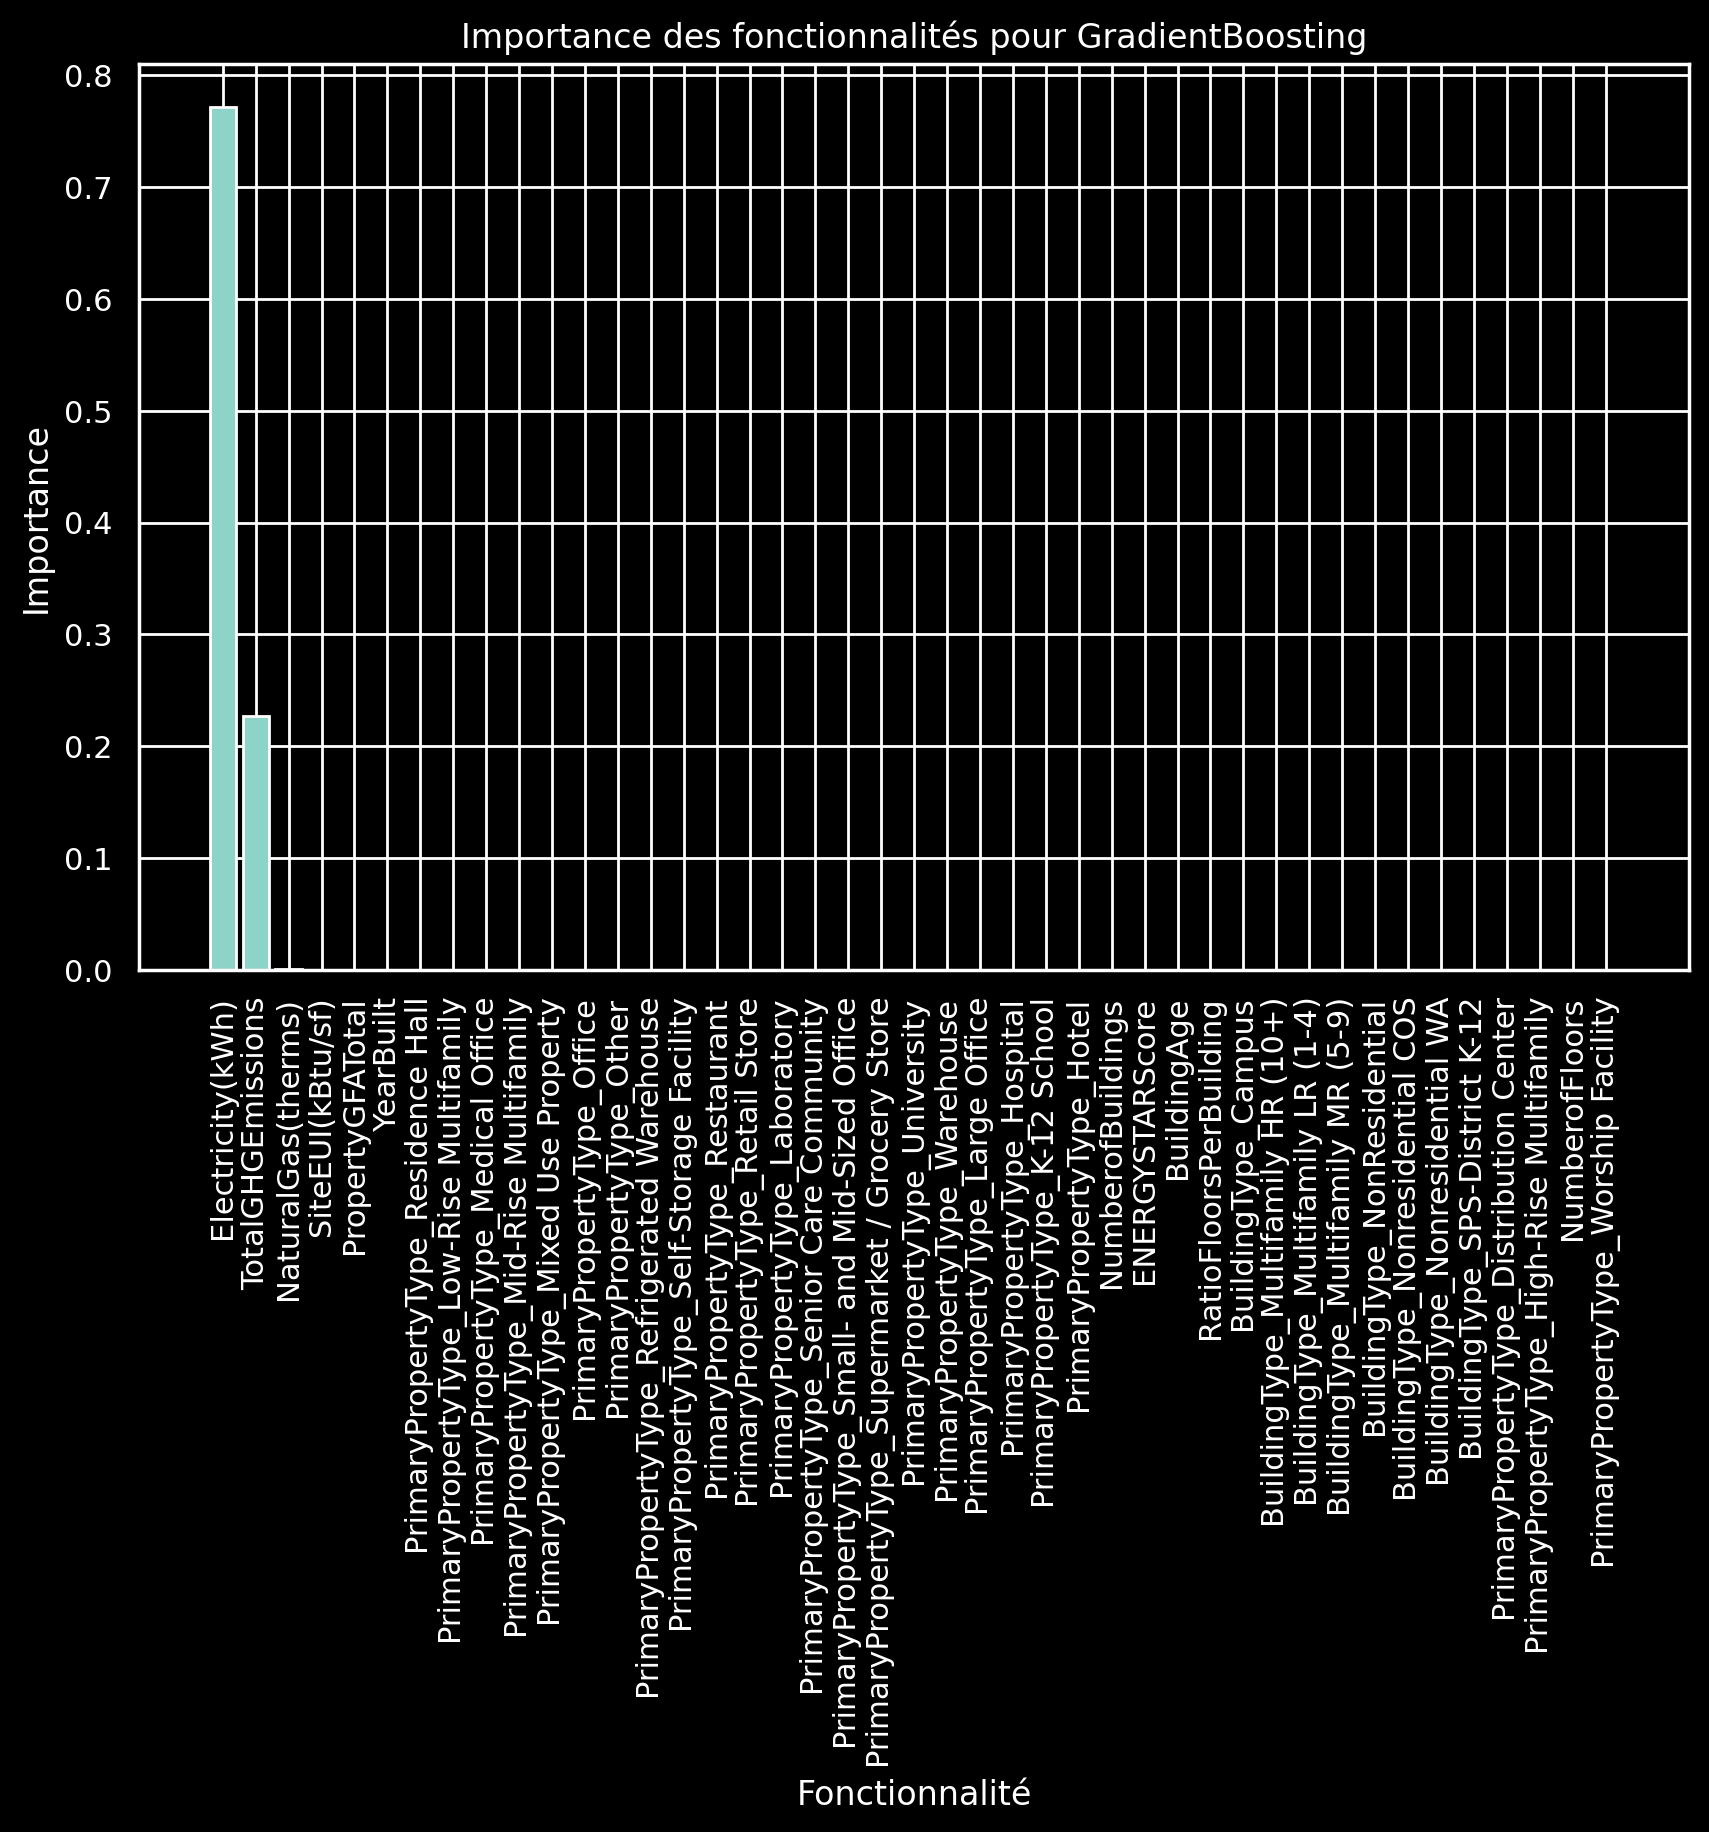

In [419]:
importance = best_model_gbr.feature_importances_
feature_importance = pd.DataFrame(list(zip(X, importance)), columns=["feature", "importance"])
feature_importance = feature_importance.sort_values(by="importance", ascending=False)

# créer un graphique en barres
plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.xlabel('Fonctionnalité')
plt.ylabel('Importance')
plt.title('Importance des fonctionnalités pour GradientBoosting')

# afficher le graphique
plt.show()

<font size="5">4. RandomForest Feature Importance</font>

In [420]:
importance = best_model_rfr.feature_importances_
feature_importance = pd.DataFrame(list(zip(X, importance)), columns=["feature", "importance"])
feature_importance = feature_importance.sort_values(by="importance", ascending=False)
print(feature_importance)

                                            feature    importance
5                                  Electricity(kWh)  9.057689e-01
7                                 TotalGHGEmissions  8.224295e-02
6                                NaturalGas(therms)  2.458526e-03
8                                   ENERGYSTARScore  1.824365e-03
4                                  SiteEUI(kBtu/sf)  1.639409e-03
9                                       BuildingAge  1.070903e-03
2                                  PropertyGFATotal  1.000989e-03
25                 PrimaryPropertyType_Large Office  8.857714e-04
0                                         YearBuilt  7.385615e-04
10                           RatioFloorsPerBuilding  6.506270e-04
1                                    NumberofFloors  4.589715e-04
31                        PrimaryPropertyType_Other  4.152002e-04
3                                 NumberofBuildings  2.288168e-04
15                      BuildingType_NonResidential  1.922951e-04
40        

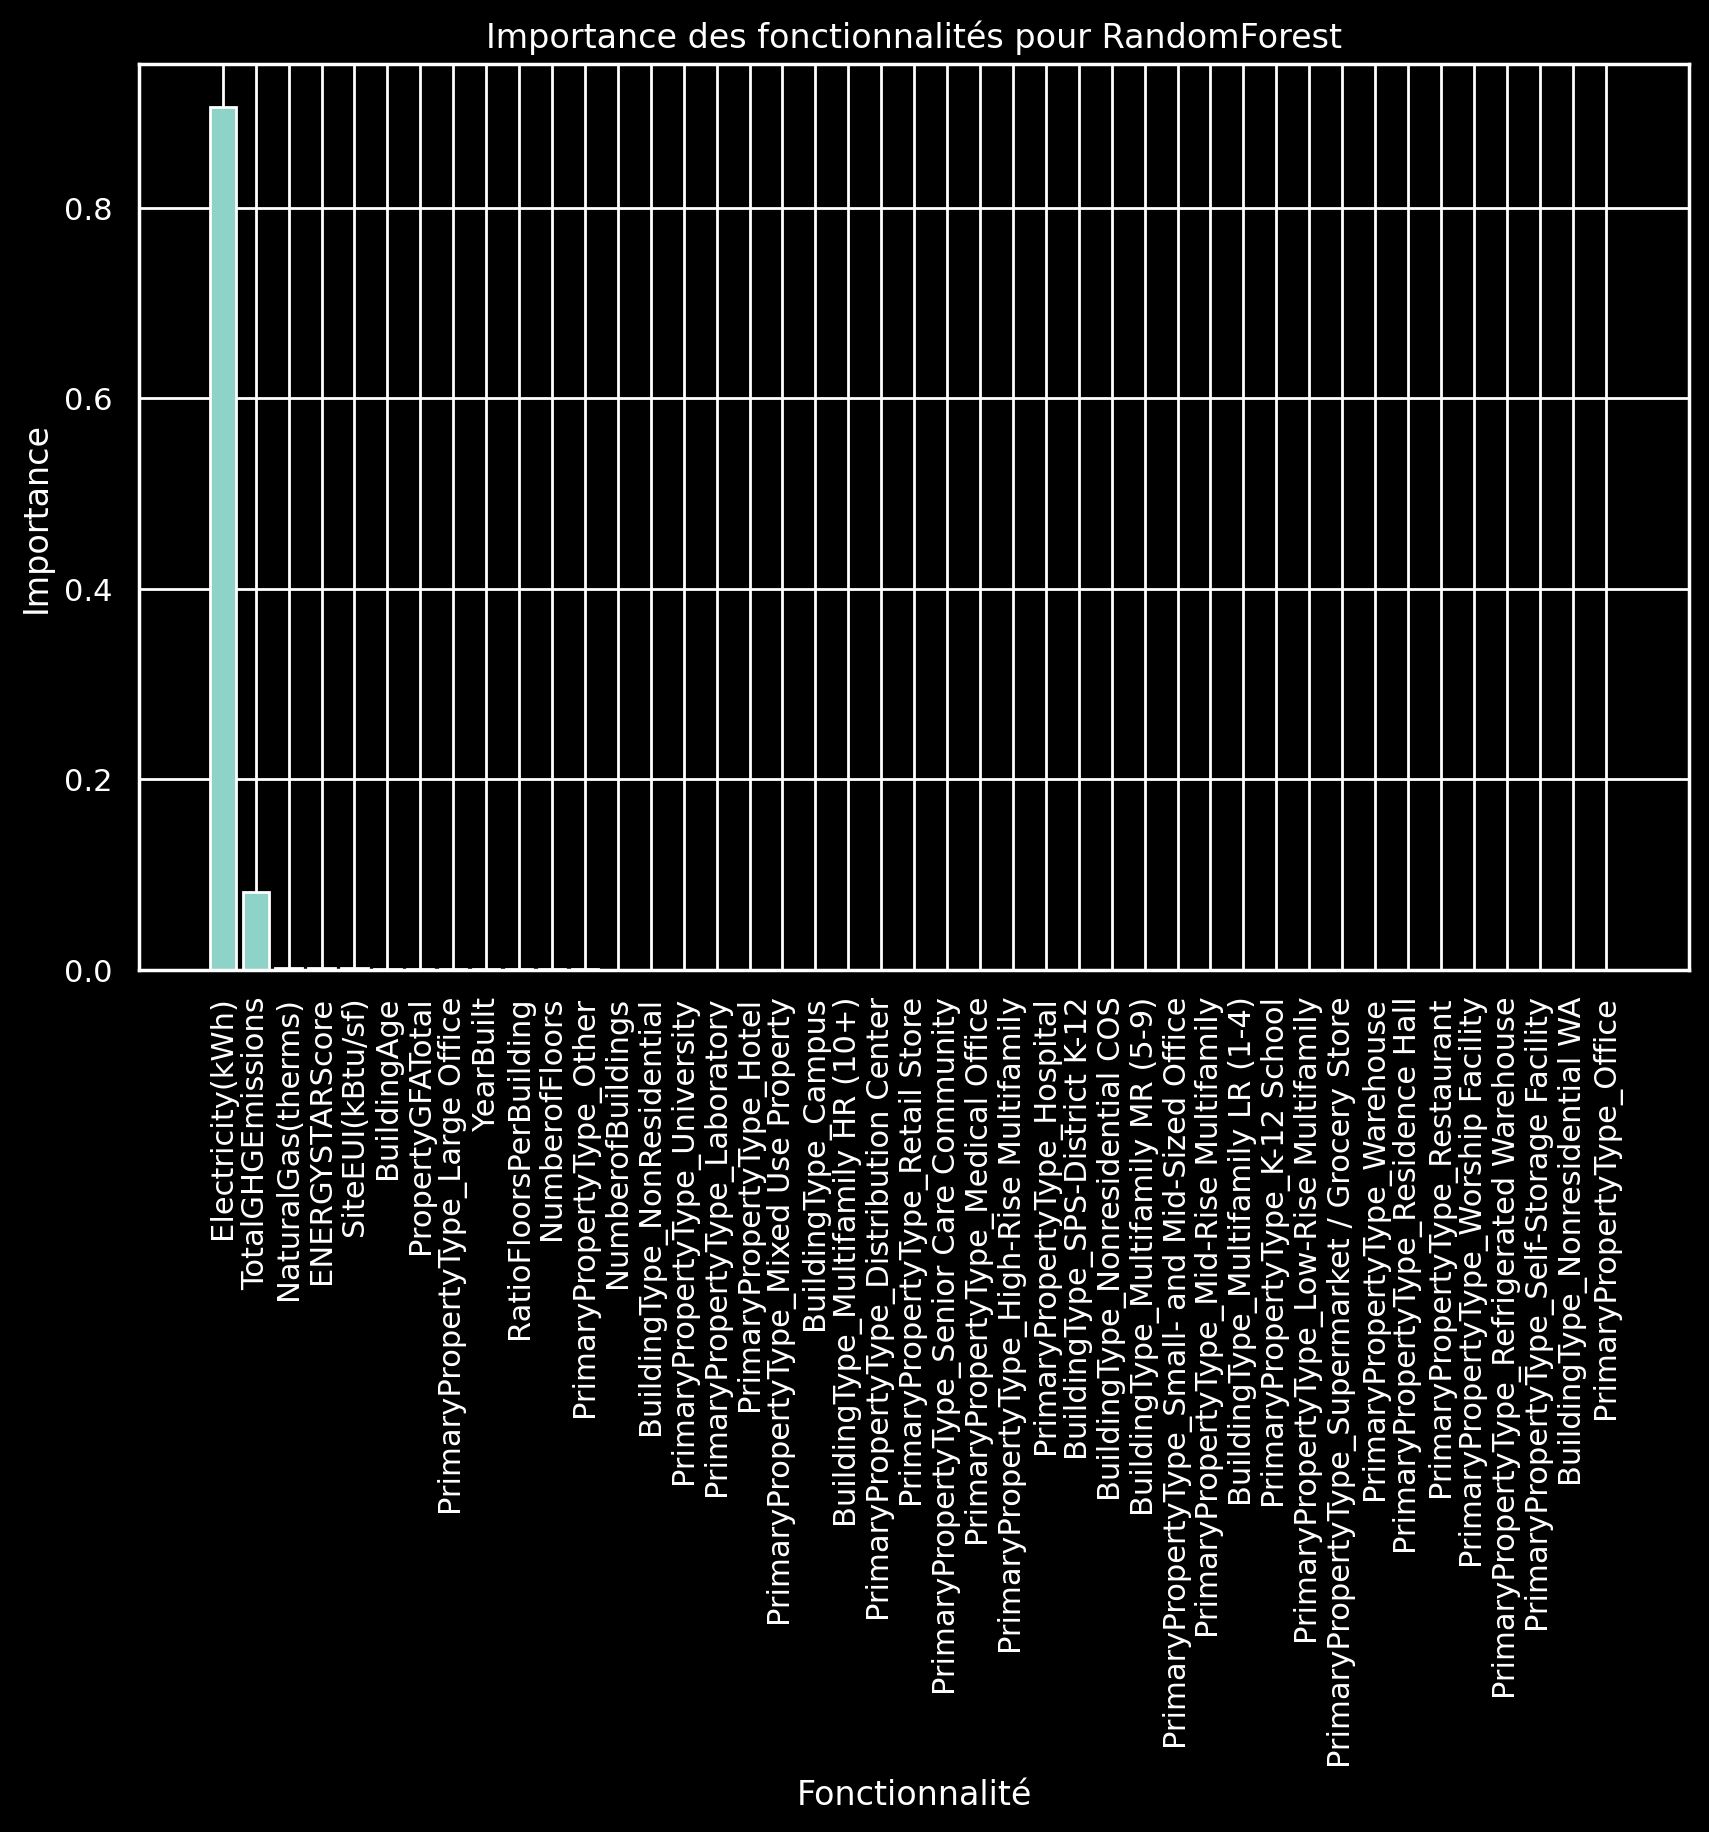

In [421]:
importance = best_model_rfr.feature_importances_
feature_importance = pd.DataFrame(list(zip(X, importance)), columns=["feature", "importance"])
feature_importance = feature_importance.sort_values(by="importance", ascending=False)

# créer un graphique en barres
plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.xlabel('Fonctionnalité')
plt.ylabel('Importance')
plt.title('Importance des fonctionnalités pour RandomForest')

# afficher le graphique
plt.show()

<font size="5">5. DecisionTreeRegressor Feature Importance</font>

In [422]:
importance = best_model_dtr.feature_importances_
feature_importance = pd.DataFrame(list(zip(X, importance)), columns=["feature", "importance"])
feature_importance = feature_importance.sort_values(by="importance", ascending=False)
print(feature_importance)

                                            feature  importance
5                                  Electricity(kWh)    0.907616
7                                 TotalGHGEmissions    0.084581
2                                  PropertyGFATotal    0.003237
4                                  SiteEUI(kBtu/sf)    0.001859
6                                NaturalGas(therms)    0.001572
25                 PrimaryPropertyType_Large Office    0.000640
20        PrimaryPropertyType_High-Rise Multifamily    0.000211
8                                   ENERGYSTARScore    0.000187
0                                         YearBuilt    0.000049
9                                       BuildingAge    0.000023
37        PrimaryPropertyType_Senior Care Community    0.000014
10                           RatioFloorsPerBuilding    0.000011
32       PrimaryPropertyType_Refrigerated Warehouse    0.000000
28         PrimaryPropertyType_Mid-Rise Multifamily    0.000000
29           PrimaryPropertyType_Mixed U

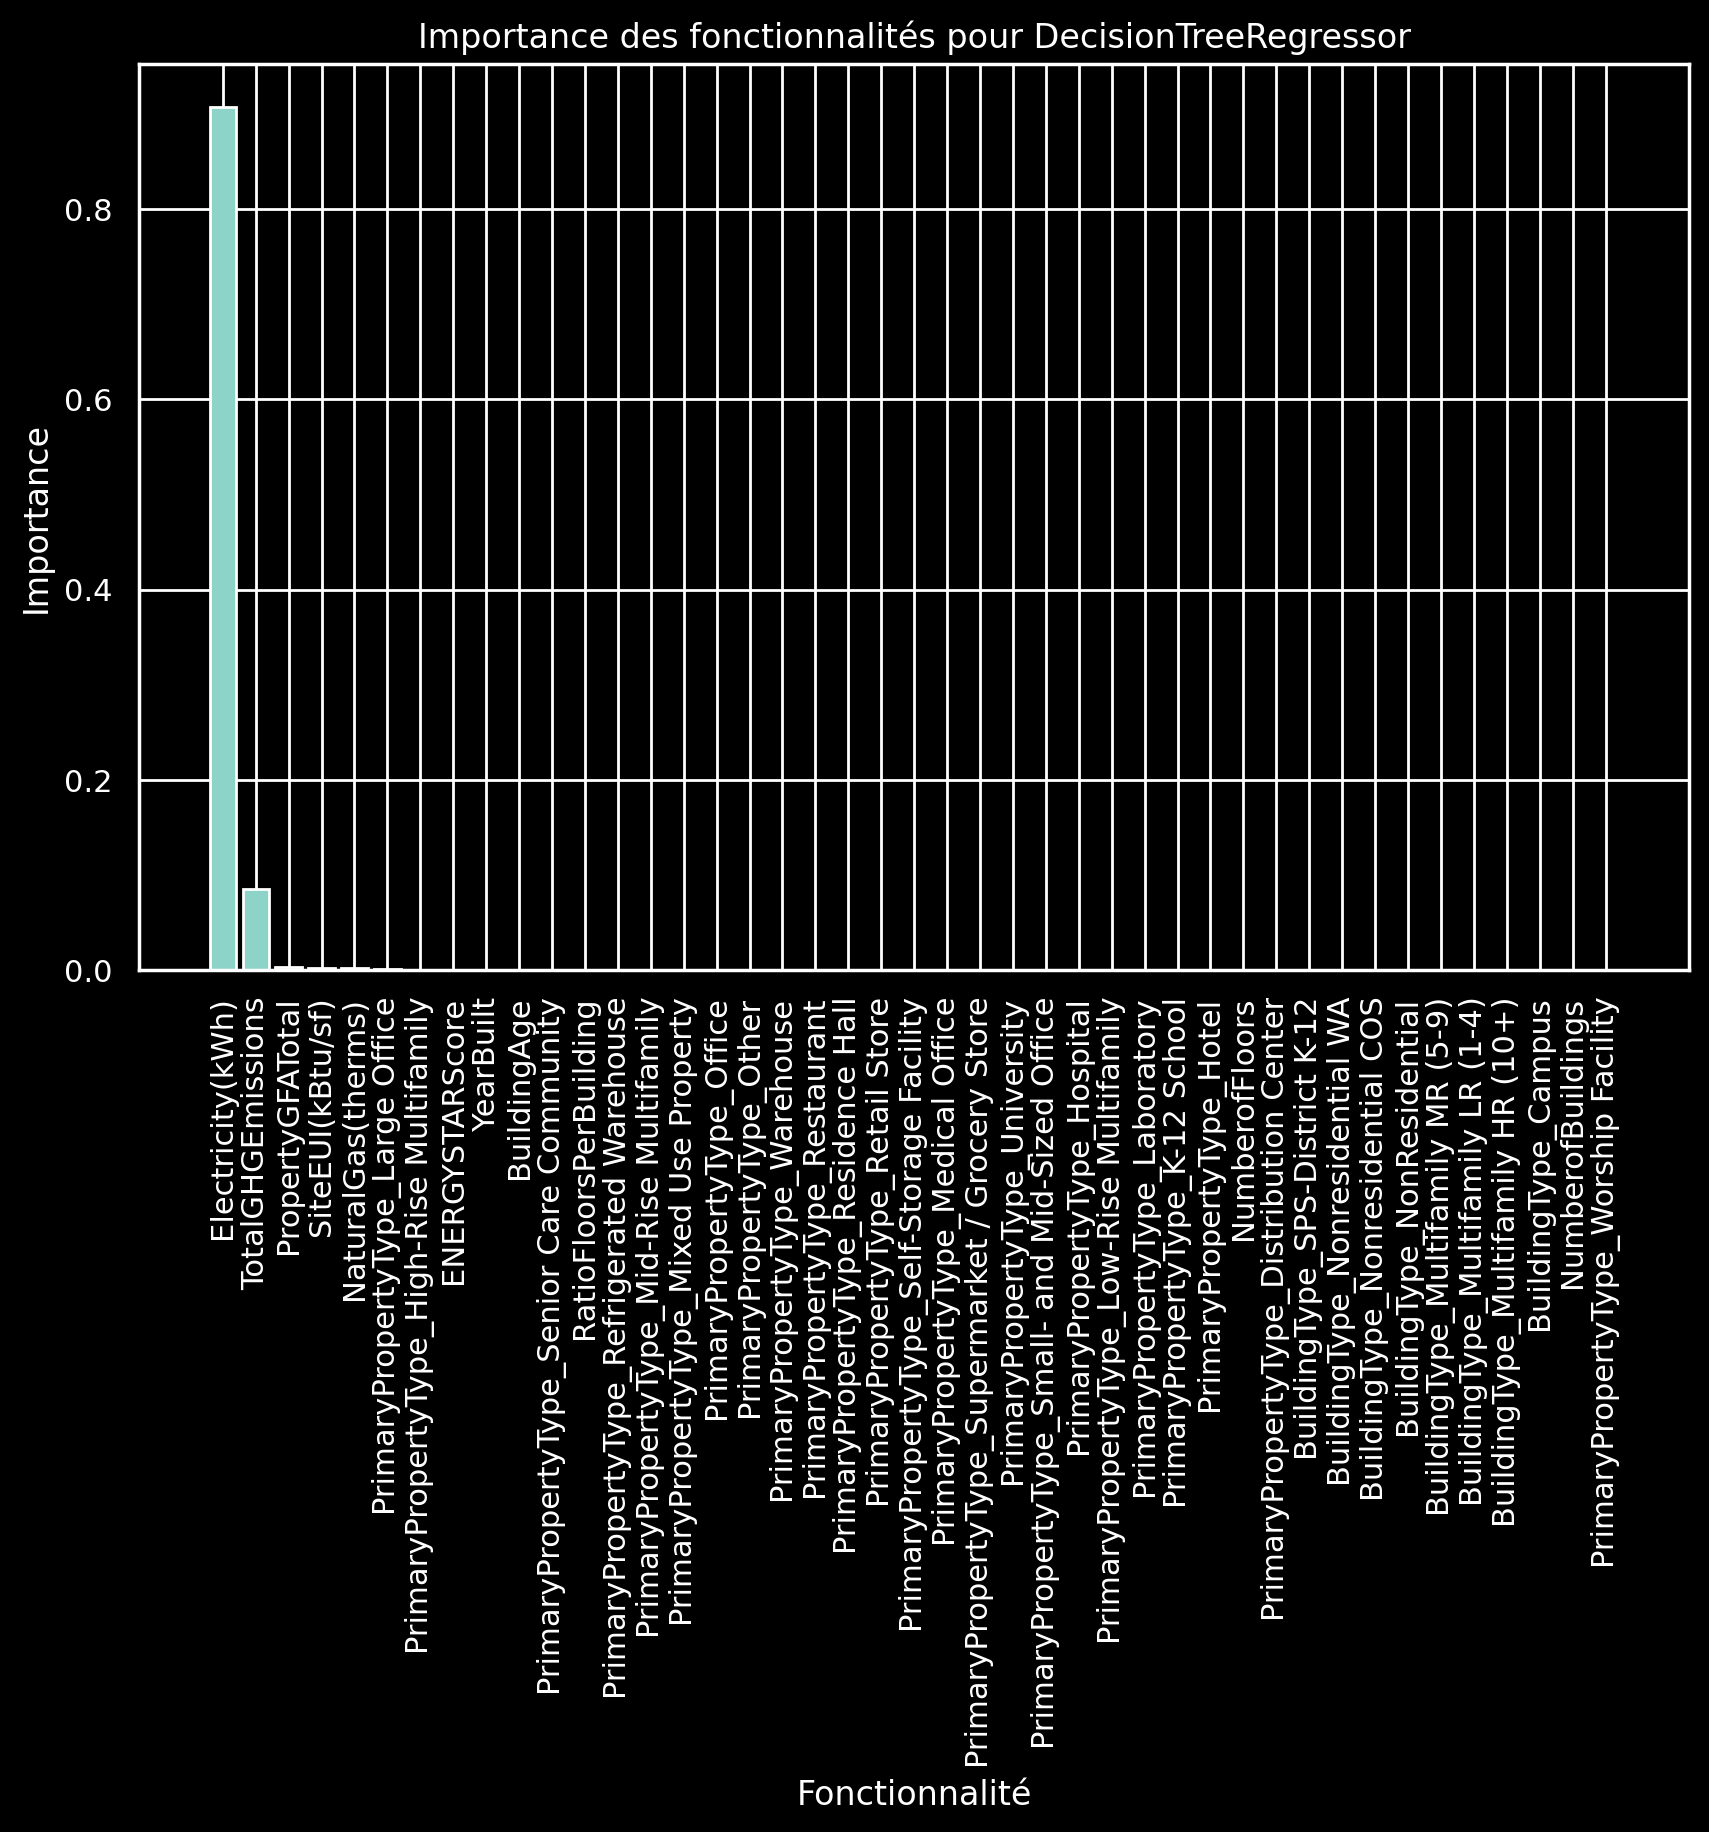

In [423]:
importance = best_model_dtr.feature_importances_
feature_importance = pd.DataFrame(list(zip(X, importance)), columns=["feature", "importance"])
feature_importance = feature_importance.sort_values(by="importance", ascending=False)

# créer un graphique en barres
plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.xlabel('Fonctionnalité')
plt.ylabel('Importance')
plt.title('Importance des fonctionnalités pour DecisionTreeRegressor')

# afficher le graphique
plt.show()

<font size="5">6. Pertinence de l'ENERGYStarScore</font>

Nous avons pu voir en analysant les features importances que l'ENERGYStarScore n'est pas
pertinent pour la prédiction de la consommation totale d'énergie.

Il revient souvent dans le haut de la liste lorsque l'on affiche les feature importances,
cependant sa valeur est trop faible pour avoir un quelconque impact.

En conclusion, cette variable n'est pas pertinente pour la prédiction totale d'énergie.